<a href="https://colab.research.google.com/github/VictorAlexandr/Data-Science-Projects/blob/main/An%C3%A1lise_de_Qualidade_de_Vinho_com_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo:** Criar um modelo de machine learning que possa prever a qualidade de um vinho com base em suas características físico-químicas.

**Dataset:** Wine Quality Dataset (disponível no Kaggle)

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('WineQT.csv')

In [33]:
# Explorar o dataset
print(df.head())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [34]:
print(X_test.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')


In [35]:
# Tratar os dados
df = df.dropna()
df = df[(df['quality'] >= 0) & (df['quality'] <= 10)]

In [36]:
# Dividir os dados
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Definir os parâmetros a ajustar
parametros = {
    'n_estimators': [50, 100, 200],
   'max_depth': [None, 5, 10],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 5, 10]
}

In [38]:
# Criar um objeto GridSearchCV para ajustar os parâmetros
grid_search = GridSearchCV(RandomForestRegressor(), parametros, cv=5)

In [39]:
# Ajustar os parâmetros
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [40]:
# Obter os melhores parâmetros
melhores_parametros = grid_search.best_params_
print(melhores_parametros)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [41]:
# Treinar o modelo com os melhores parâmetros
modelo = RandomForestRegressor(**melhores_parametros)
modelo.fit(X_train, y_train)

# Avaliar o modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 0.31
MAE: 0.42


In [42]:
# Otimizar o modelo
from sklearn.model_selection import GridSearchCV
parametros = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), parametros, cv=5)
grid_search.fit(X_train, y_train)
print(f'Melhor parâmetro: {grid_search.best_params_}')

Melhor parâmetro: {'fit_intercept': True}


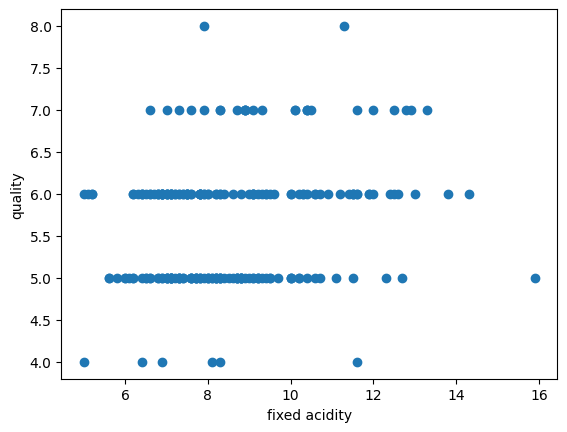

In [43]:
# Visualizar os resultados
plt.scatter(X_test['fixed acidity'], y_test)
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.show()